## Comparing SVM and Ridge Regression (example data set)

Dataset taken from: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [14]:
from sklearn.linear_model import Ridge, RidgeClassifier, LinearRegression
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
from ipywidgets import *
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [16]:
# Loading the data and pre-processing
bc=pd.read_csv("../../data/breast_cancer.csv")
yd=pd.get_dummies(bc.diagnosis)
y=yd.M
X=bc.iloc[:,2:32]
scaler = StandardScaler()
X=scaler.fit_transform(X)
bc #M Malignat (bad), B Benin good

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [17]:
np.sum(bc.diagnosis == 'B'), np.sum(bc.diagnosis == 'M')

(357, 212)

In [18]:
#Splitting in training and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [20]:
# Ridge Regression with optimal Parameter
clf = RidgeClassifier(alpha=0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred[0:10] 
,y_test[0:10,]

512    1
457    0
439    0
298    0
37     0
515    0
382    0
310    0
538    0
345    0
Name: M, dtype: uint8

In [22]:
np.mean(y_pred == y_test)

0.965034965034965

In [23]:
# SVM with linear Kernal and optimal Parameter 
clf = svm.SVC(kernel='linear', C=0.01)
clf.fit(X_train, y_train)
np.mean(clf.predict(X_test) == y_test)

0.965034965034965

In [24]:
# SVM with RBF Kernel
clf = svm.SVC(kernel='rbf', C=100, gamma=0.001)
clf.fit(X_train, y_train)
np.mean(clf.predict(X_test) == y_test)

0.97902097902097907

## Searching for the best parametes

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


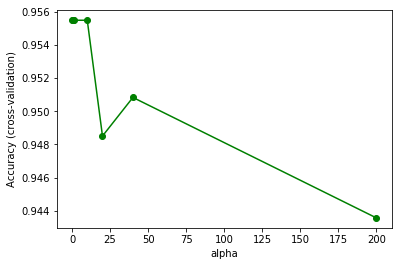

In [9]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Ridge, RidgeClassifier, LinearRegression
scores = []
alphas = (0,0.5,1,10,20,40,200)
for alpha in alphas:
    clf = RidgeClassifier(alpha=alpha)
    res = cross_val_score(clf, X_train,y_train,cv=10,scoring='accuracy')
    scores.append(res.mean())
plt.plot(alphas, scores, 'bo',alphas, scores, 'k',color="green")
plt.xlabel("alpha")
plt.ylabel("Accuracy (cross-validation)")

In [10]:
scores, alphas

([0.95547902655106287,
  0.95547902655106287,
  0.95547902655106287,
  0.95547902655106287,
  0.94850228236501621,
  0.95082786376036521,
  0.94356886259892503],
 (0, 0.5, 1, 10, 20, 40, 200))

In [11]:
scores = []
Cs = (0.001, 0.005, 0.01, 0.1, 1, 10, 100, 1000,1e4)
for C in Cs:
    clf = svm.SVC(C=C, kernel='linear')
    res = cross_val_score(clf, X_train,y_train,cv=10,scoring='accuracy')
    scores.append(res.mean())

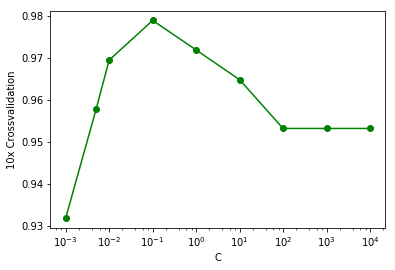

In [12]:
plt.semilogx(Cs, scores, 'bo',Cs, scores, 'k',color="green")
plt.xlabel("C")
plt.ylabel("10x Crossvalidation")

In [13]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]}]
grid=GridSearchCV(SVC(),param_grid,cv=10,scoring='accuracy',n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_, grid.best_score_

/usr/local/lib/python3.4/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


({'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}, 0.9812206572769953)